### Bibliography (strangely at the top)

* https://towardsdatascience.com/what-data-tells-us-about-how-airbnb-is-being-used-in-seattle-b948a05b84b6
* http://jasontdean.com/python/seattleCrime.html
* https://nycdatascience.com/blog/student-works/crime-density-in-seattle/
* https://towardsdatascience.com/airbnb-part-b-python-interactive-map-natural-language-processing-48d472f14da3
* https://towardsdatascience.com/reverse-geocoding-in-python-a915acf29eb6
* 


#### Data Sources
* https://www.kaggle.com/airbnb/seattle/activity
* https://data.seattle.gov/browse?category=Public+Safety&provenance=official
* https://data.seattle.gov/Public-Safety/SPD-Crime-Data-2008-Present/tazs-3rd5/data
* https://www.seattle.gov/police/information-and-data/tweets-by-beat
* 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
calendar = pd.read_csv('../archive/calendar.csv')
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
# https://stackoverflow.com/questions/44469313/price-column-object-to-int-in-pandas
calendar['price'] = calendar['price'].replace('[\$,\,]', '', regex=True).astype(float)
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
len(calendar)

1393570

In [5]:
listing_ids = pd.unique(calendar['listing_id'])
listing_ids

array([  241032,   953595,  3308979, ..., 10267360,  9604740, 10208623])

In [6]:
calendar

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


#### Histogram of Occupancy

In [7]:
# There are 365 dates per listing_id.  Presumably only the ones with a non-NaN 
# price represent stays
calendar.groupby('listing_id').count()

,date,available,price
listing_id,,,
3335,365,365,309
4291,365,365,365
5682,365,365,309
6606,365,365,365
7369,365,365,53
...,...,...,...
10332096,365,365,365
10334184,365,365,361
10339144,365,365,0


In [8]:
# Confirming there is exactly one entry for each listing_id and date.  
(calendar.groupby(['listing_id', 'date']).count() != 1)['available'].sum()

0

In [9]:
occupancy = calendar.dropna(axis=0, subset=['price']).groupby('listing_id').count()['price']
occupancy

listing_id
3335        309
4291        365
5682        309
6606        365
7369         53
           ... 
10331249    354
10332096    365
10334184    361
10339145    365
10340165    358
Name: price, Length: 3723, dtype: int64

(array([ 228.,  222.,  334.,  191.,  273.,  128.,  128.,  191.,  294.,
        1734.]),
 array([  1. ,  37.4,  73.8, 110.2, 146.6, 183. , 219.4, 255.8, 292.2,
        328.6, 365. ]),
 <BarContainer object of 10 artists>)

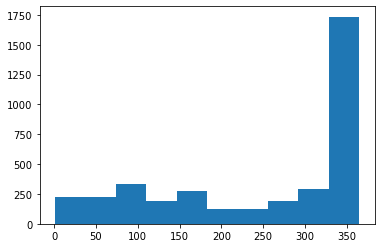

In [10]:
# Histogram of occupancy rates
plt.hist(occupancy)

#### Seasonal Fluctuations In Price

In [11]:
price_by_date = calendar.dropna(axis=0, subset=['price']).groupby(['date'])['price'].mean()

In [12]:
# Double-check one result from above
calendar[calendar['date'] == '2016-01-08']['price'].dropna().mean()

127.6408529741863

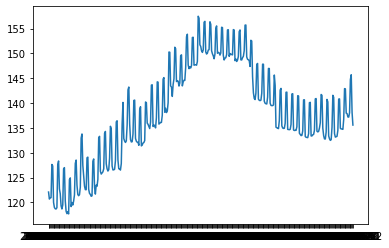

In [13]:
# Apparently summer is very popular, oh... and weekends.
plt.plot(price_by_date)

#### What do the NaNs mean?

In [14]:
# 'price' of NaN exactly coincides with 'available' being False
(~(calendar['price'].isnull() == (calendar['available'] == 'f'))).sum()

0

#### The Myth Of Optimal Pricing

In [15]:
optimal_pricing = pd.DataFrame(data=calendar.groupby('listing_id').count()['price']).rename(columns={'price':'occupancy'})

In [16]:
optimal_pricing['price'] = calendar.groupby('listing_id')['price'].mean()

In theory as we increase prices occupancy goes down.  But I don't see much sign of it here.

Admittedly, these listing are not all equivalent and each will be more or less efficiently priced, in which case it will acquire some balanced level of occupancy consistent with its merits.  Presumably we could expect that optimal degree of occupancy to be consistent throughout the various listings?  In which case we should see a bulge in the distribution, but we don't.  Maybe the pricing is not efficient.  Maybe individual owners are not responsive to their occupancy levels?

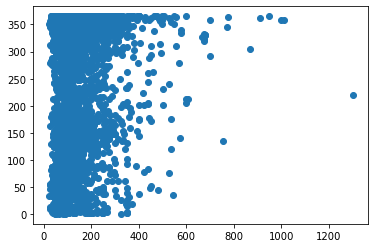

In [17]:
plt.scatter(x=optimal_pricing['price'], y=optimal_pricing['occupancy'])

This chart would have been better as a heatmap.

### Thoughts

1. Examining the *reviews* dataset would require sentiment analysis since there are no numeric ratings.  It'll be NLP all over again.  
    - Correction: *listings* includes review scores.
2. *reviews* also seems to be from 2015, so not contemporaneous with the *calendar* dataset.
3. *listings* includes listing descriptions and some location information.


In [18]:
listings = pd.read_csv('../archive/listings.csv')

In [19]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [20]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

#### Quick Aside To Confirm That We Have All The Columns

In [21]:
with open('../archive/listings.csv', 'rb') as f:
    first_line = f.readline()

In [22]:
str(first_line).split(',')

["b'id",
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price'

#### Number of Listings by Neighborhood

In [23]:
listings['neighbourhood']

0        Queen Anne
1        Queen Anne
2        Queen Anne
3        Queen Anne
4        Queen Anne
           ...     
3813        Fremont
3814    Portage Bay
3815            NaN
3816            NaN
3817     Queen Anne
Name: neighbourhood, Length: 3818, dtype: object

In [24]:
listings['neighbourhood'].unique()

array(['Queen Anne', nan, 'Ballard', 'Phinney Ridge', 'Fremont',
       'Lower Queen Anne', 'Westlake', 'Wallingford', 'Green Lake',
       'Minor', 'Madrona', 'Harrison/Denny-Blaine', 'Leschi',
       'University District', 'Roosevelt', 'Madison Park', 'Capitol Hill',
       'Atlantic', 'North Beacon Hill', 'Central Business District',
       'Pike Place Market', 'Pike Market', 'Eastlake', 'Portage Bay',
       'South Lake Union', 'Magnolia', 'Belltown',
       'International District', 'Yesler Terrace', 'First Hill',
       'Pioneer Square', 'Gatewood', 'The Junction', 'Arbor Heights',
       'Alki', 'North Admiral', 'Crown Hill', 'Genesee', 'Fairmount Park',
       'Interbay', 'Industrial District', 'Holly Park',
       'South Beacon Hill', 'Greenwood', 'Bitter Lake', 'Fauntleroy',
       'Mount Baker', 'Columbia City', 'Seward Park', 'Brighton',
       'South Delridge', 'Highland Park', 'High Point', 'View Ridge',
       'Windermere', 'Dunlap', 'Rainier Beach', 'North Delridge',
  

In [25]:
counts_by_neighborhood = listings.groupby('neighbourhood')['id'].count().sort_values(ascending=False)
counts_by_neighborhood

neighbourhood
Capitol Hill          351
Ballard               213
Belltown              204
Minor                 192
Queen Anne            187
                     ... 
South Park              2
Pike Market             2
Fairmount Park          1
Roxhill                 1
North College Park      1
Name: id, Length: 81, dtype: int64

<AxesSubplot:xlabel='neighbourhood'>

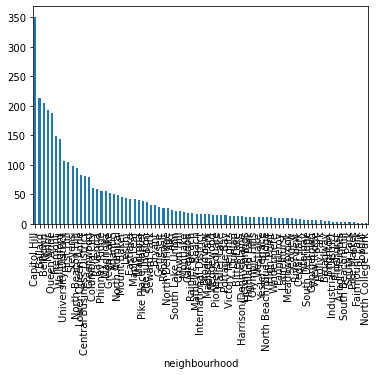

In [26]:
counts_by_neighborhood.plot.bar()

### What Other Datasets Are Available For Seattle?

In [58]:
# https://data.seattle.gov/Public-Safety/SPD-Crime-Data-2008-Present/tazs-3rd5/data
# filtered to return only offenses started in 2016
seattle_pd = pd.read_csv('../SPD_Crime_Data/SPD_Crime_Data__2008-Present.csv')

In [59]:
seattle_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70425 entries, 0 to 70424
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Report Number           70425 non-null  object 
 1   Offense ID              70425 non-null  int64  
 2   Offense Start DateTime  70425 non-null  object 
 3   Offense End DateTime    33270 non-null  object 
 4   Report DateTime         70425 non-null  object 
 5   Group A B               70425 non-null  object 
 6   Crime Against Category  70425 non-null  object 
 7   Offense Parent Group    70425 non-null  object 
 8   Offense                 70425 non-null  object 
 9   Offense Code            70425 non-null  object 
 10  Precinct                70425 non-null  object 
 11  Sector                  70425 non-null  object 
 12  Beat                    70425 non-null  object 
 13  MCPP                    70425 non-null  object 
 14  100 Block Address       68241 non-null

In [60]:
seattle_pd['Beat']

0             F2
1             K1
2             M3
3             W3
4        UNKNOWN
          ...   
70420         K2
70421         W1
70422         E1
70423         G3
70424         U3
Name: Beat, Length: 70425, dtype: object

In [61]:
listings.groupby('neighbourhood').first().index

Index(['Alki', 'Arbor Heights', 'Atlantic', 'Ballard', 'Belltown',
       'Bitter Lake', 'Brighton', 'Broadview', 'Broadway', 'Bryant',
       'Capitol Hill', 'Cedar Park', 'Central Business District',
       'Columbia City', 'Crown Hill', 'Dunlap', 'Eastlake', 'Fairmount Park',
       'Fauntleroy', 'First Hill', 'Fremont', 'Gatewood', 'Genesee',
       'Georgetown', 'Green Lake', 'Greenwood', 'Haller Lake',
       'Harrison/Denny-Blaine', 'High Point', 'Highland Park', 'Holly Park',
       'Industrial District', 'Interbay', 'International District',
       'Laurelhurst', 'Leschi', 'Licton Springs', 'Lower Queen Anne',
       'Madison Park', 'Madrona', 'Magnolia', 'Maple Leaf', 'Mathews Beach',
       'Meadowbrook', 'Minor', 'Montlake', 'Mount Baker', 'North Admiral',
       'North Beach/Blue Ridge', 'North Beacon Hill', 'North College Park',
       'North Delridge', 'Olympic Hills', 'Phinney Ridge', 'Pike Market',
       'Pike Place Market', 'Pinehurst', 'Pioneer Square', 'Portage Bay

In [31]:
'University District' in listings['neighbourhood'].dropna().unique()

True

In [62]:
# https://towardsdatascience.com/what-data-tells-us-about-how-airbnb-is-being-used-in-seattle-b948a05b84b6
# Again... by visual correspondence between two maps we can get a crude mapping between AirBnB neighbourhoods 
# and police department sectors.
# https://www.seattle.gov/police/information-and-data/tweets-by-beat
crude_mapping = {
    'M1':'Central Business District',
    'M2':'Central Business District',
    'M3':'Central Business District',
    'K1':'Central Business District',
    'K2':'Central Business District',
    'K3':'First Hill',
    'D1':'Belltown',
    'D2':'Belltown',
    'Q2':'Lower Queen Anne',
    'Q3':'Lower Queen Anne',
    'G1':'First Hill',
    'G2':'Minor',
    'G3':'Minor',
    'E1':'Broadway',
    'E2':'Broadway',
    'E3':'Broadway',
    'C1':'Broadway',
    'C2':'Stevens',
    'C3':'Stevens',
    'B3':'Wallingford',
    'J3':'Wallingford',
    'B2':'Fremont',
    'U2':'University District',
    
}

In [63]:
crime_neighborhoods = np.unique(list(crude_mapping.values()))
color_by_neighborhood = dict(zip(crime_neighborhoods, range(1, crime_neighborhoods.size+1)))
color_by_neighborhood

{'Belltown': 1,
 'Broadway': 2,
 'Central Business District': 3,
 'First Hill': 4,
 'Fremont': 5,
 'Lower Queen Anne': 6,
 'Minor': 7,
 'Stevens': 8,
 'University District': 9,
 'Wallingford': 10}

In [64]:
seattle_pd['Beat']

0             F2
1             K1
2             M3
3             W3
4        UNKNOWN
          ...   
70420         K2
70421         W1
70422         E1
70423         G3
70424         U3
Name: Beat, Length: 70425, dtype: object

In [65]:
seattle_pd.drop(seattle_pd.loc[seattle_pd['Beat']=='UNKNOWN'].index, axis=0, inplace=True)

In [66]:
seattle_pd['Beat'].isin(crude_mapping.keys())

0        False
1         True
2         True
3        False
5        False
         ...  
70420     True
70421    False
70422     True
70423     True
70424    False
Name: Beat, Length: 69974, dtype: bool

In [69]:
seattle_pd['neighborhood'] = seattle_pd['Beat'].map(crude_mapping)

#### Explore uising Lat/Long instead of neighborhood

In [74]:
lat_long_pd = seattle_pd[['Latitude','Longitude','Beat']].copy()
lat_long_pd.rename(mapper={'Latitude':'latitude', 'Longitude':'longitude'}, axis=1, inplace=True)
lat_long_pd['neighborhood'] = lat_long_pd['Beat'].map(crude_mapping)
lat_long_pd = lat_long_pd.dropna(axis=0)

In [75]:
lat_long_pd

,latitude,longitude,Beat,neighborhood
1,47.605483,-122.330820,K1,Central Business District
2,47.611639,-122.334918,M3,Central Business District
6,47.649651,-122.322765,C1,Broadway
11,47.606229,-122.310249,G2,Minor
13,47.623950,-122.361939,Q3,Lower Queen Anne
...,...,...,...,...
70417,47.612066,-122.341323,M1,Central Business District
70419,47.600880,-122.332224,K2,Central Business District
70420,47.600880,-122.332224,K2,Central Business District
70422,47.619843,-122.323273,E1,Broadway


In [76]:
lat_long_pd['Map Color'] = lat_long_pd['neighborhood'].map(color_by_neighborhood)

In [77]:
lat_long_pd

,latitude,longitude,Beat,neighborhood,Map Color
1,47.605483,-122.330820,K1,Central Business District,3
2,47.611639,-122.334918,M3,Central Business District,3
6,47.649651,-122.322765,C1,Broadway,2
11,47.606229,-122.310249,G2,Minor,7
13,47.623950,-122.361939,Q3,Lower Queen Anne,6
...,...,...,...,...,...
70417,47.612066,-122.341323,M1,Central Business District,3
70419,47.600880,-122.332224,K2,Central Business District,3
70420,47.600880,-122.332224,K2,Central Business District,3
70422,47.619843,-122.323273,E1,Broadway,2


In [78]:
# drop 0.0, 0.0 locations
lat_long_pd = lat_long_pd.drop(lat_long_pd[lat_long_pd['latitude'] == 0.0].index, axis=0)

In [79]:
lat_long_pd['Map Color']

1        3
2        3
6        2
11       7
13       6
        ..
70417    3
70419    3
70420    3
70422    2
70423    7
Name: Map Color, Length: 33619, dtype: int64

<ipython-input-80-0abd12b8cf62>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


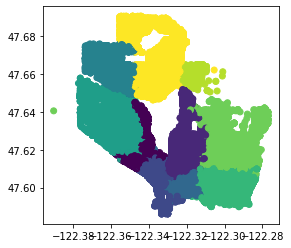

In [80]:
# https://stackoverflow.com/questions/7965743/how-can-i-set-the-aspect-ratio-in-matplotlib
# https://stackoverflow.com/questions/47006268/matplotlib-scatter-plot-with-color-label-and-legend-specified-by-c-option
plt.scatter(x=lat_long_pd['longitude'], y=lat_long_pd['latitude'], c=lat_long_pd['Map Color'], 
            label=list(color_by_neighborhood.keys()))
plt.axes().set_aspect('equal')

In [43]:
# groups = data.groupby("Category")
# for name, group in groups:
#     plt.plot(group["X Value"], group["Y Value"], marker="o", linestyle="", label=name)
# plt.legend()

<ipython-input-81-638c8d288602>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


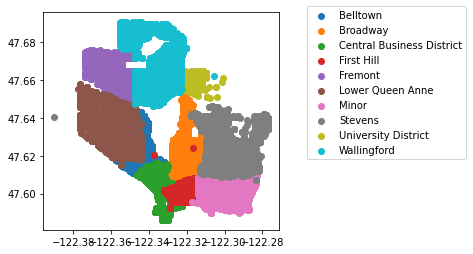

In [81]:
# https://www.kite.com/python/answers/how-to-color-a-scatter-plot-by-category-using-matplotlib-in-python
# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
groups = lat_long_pd.groupby('neighborhood')
for name, group in groups:
    plt.scatter(x=group['longitude'], y=group['latitude'], label=name)
plt.legend()
plt.axes().set_aspect('equal')
plt.legend(bbox_to_anchor=(1.1, 1.05))

#### Compute 'Crime Rates' by Neighborhood

In [82]:
seattle_pd['neighborhood']

0                              NaN
1        Central Business District
2        Central Business District
3                              NaN
5                              NaN
                   ...            
70420    Central Business District
70421                          NaN
70422                     Broadway
70423                        Minor
70424                          NaN
Name: neighborhood, Length: 69974, dtype: object

In [83]:
seattle_pd = seattle_pd.dropna(axis=0, subset=['neighborhood'])

In [84]:
crime_rates = seattle_pd.groupby('neighborhood').count()['Report Number']

In [85]:
crime_rates

neighborhood
Belltown                     2899
Broadway                     6167
Central Business District    8210
First Hill                   3133
Fremont                      1628
Lower Queen Anne             3327
Minor                        1880
Stevens                      2053
University District          1816
Wallingford                  3217
Name: Report Number, dtype: int64

#### Scatter Plot Correlating Crime Rates With Mean AirBnB Price by Neighborhood

##### How do I get the mean price for each neighborhood?  

I need a neighborhood for each 'listing_id' since the prices are in *calendar* not *listings*.

In [86]:
mean_price = calendar.groupby('listing_id')['price'].mean()
mean_price

listing_id
3335        120.000000
4291         82.000000
5682         53.944984
6606         92.849315
7369         85.000000
               ...    
10332096     40.000000
10334184    120.000000
10339144           NaN
10339145    237.904110
10340165     43.000000
Name: price, Length: 3818, dtype: float64

In [87]:
listing_ids = calendar['listing_id'].unique()
np.sort(listing_ids)

array([    3335,     4291,     5682, ..., 10339144, 10339145, 10340165])

In [88]:
listing_neighborhoods = pd.Series(data=listings['neighbourhood'][listings['id'] == listing_ids].values,
                                 index=listing_ids).sort_index()
listing_neighborhoods

3335                Dunlap
4291             Roosevelt
5682        South Delridge
6606           Wallingford
7369              Broadway
                 ...      
10332096     Olympic Hills
10334184      Capitol Hill
10339144      Capitol Hill
10339145              Alki
10340165         Greenwood
Length: 3818, dtype: object

In [89]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
price_and_neighborhood = pd.concat([mean_price, listing_neighborhoods], axis=1, join='inner')
price_and_neighborhood.rename(mapper={0:'Neighborhood', 'price':'Price'}, axis=1, inplace=True)
price_and_neighborhood

,Price,Neighborhood
3335,120.000000,Dunlap
4291,82.000000,Roosevelt
5682,53.944984,South Delridge
6606,92.849315,Wallingford
7369,85.000000,Broadway
...,...,...
10332096,40.000000,Olympic Hills
10334184,120.000000,Capitol Hill
10339144,NaN,Capitol Hill
10339145,237.904110,Alki


In [90]:
import seaborn as sns

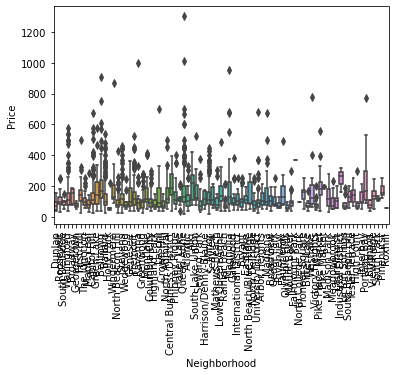

In [91]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
ax = sns.boxplot(x='Neighborhood', y="Price", data=price_and_neighborhood)
# https://stackoverflow.com/questions/44954123/rotate-xtick-labels-in-seaborn-boxplot
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

Time to filter the neighborhoods down to the central set.

In [92]:
subset_p_and_neigh = price_and_neighborhood[price_and_neighborhood['Neighborhood'].isin(list(crime_neighborhoods))]

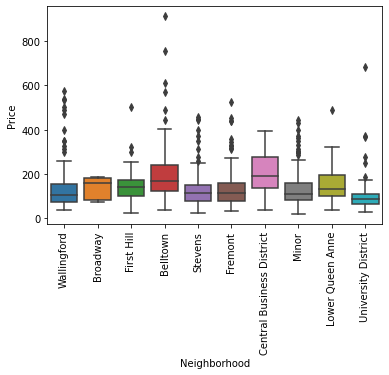

In [93]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
ax = sns.boxplot(x='Neighborhood', y="Price", data=subset_p_and_neigh)
# https://stackoverflow.com/questions/44954123/rotate-xtick-labels-in-seaborn-boxplot
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

#### Map Of Listings By Lat, Long
I'm disatisfied with trying to correlate crime data with AirBnB data on a meager list of neighborhoods.  Correlating with an imprecise hand made dict is too crude.  Trying to do something with latitude and longitude seems more appealing.  Plus I just noticed that the listings data includes Lat and Long.

In [94]:
lat_long_listings = listings[['latitude','longitude','neighbourhood']].dropna(axis=0)

In [95]:
(lat_long_listings['latitude'] == 0.0).sum()

0

In [96]:
lat_long_listings

,latitude,longitude,neighbourhood
0,47.636289,-122.371025,Queen Anne
1,47.639123,-122.365666,Queen Anne
2,47.629724,-122.369483,Queen Anne
3,47.638473,-122.369279,Queen Anne
4,47.632918,-122.372471,Queen Anne
...,...,...,...
3811,47.657898,-122.346692,Fremont
3812,47.654516,-122.358124,Fremont
3813,47.664295,-122.359170,Fremont
3814,47.649552,-122.318309,Portage Bay


<ipython-input-97-83819ea13dba>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


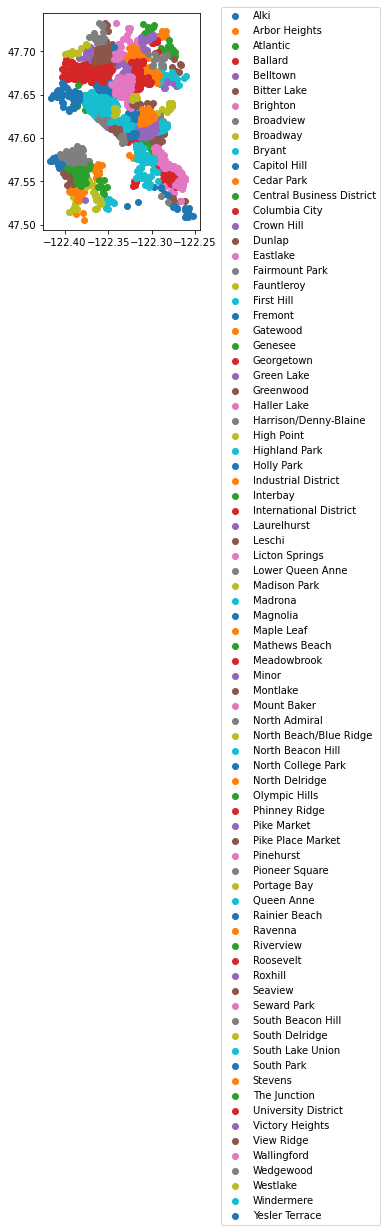

In [97]:
# https://www.kite.com/python/answers/how-to-color-a-scatter-plot-by-category-using-matplotlib-in-python
# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
groups = lat_long_listings.groupby('neighbourhood')
for name, group in groups:
    plt.scatter(x=group['longitude'], y=group['latitude'], label=name)
plt.legend()
plt.axes().set_aspect('equal')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [121]:
subset_lat_long_listings = lat_long_listings[lat_long_listings['neighbourhood'].isin(crude_mapping.values())]

<ipython-input-122-49babd44e818>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


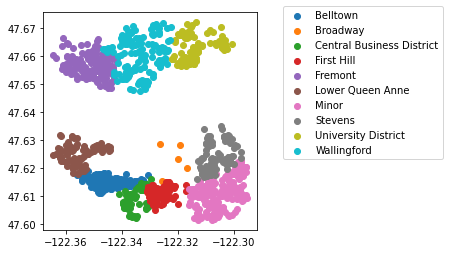

In [122]:
groups = subset_lat_long_listings.groupby('neighbourhood')
for name, group in groups:
    plt.scatter(x=group['longitude'], y=group['latitude'], label=name)
plt.legend()
plt.axes().set_aspect('equal')
plt.legend(bbox_to_anchor=(1.1, 1.05))

Even though I have discovered that I have (lat, long) data for both the crime statistics and the AirBnB listings, I still think I want to correlate the datasets by neighborhood and not (lat, long).

(lat, long) is really only good for making maps.

In [111]:
# https://towardsdatascience.com/reverse-geocoding-in-python-a915acf29eb6
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim

In [112]:
locator = Nominatim(user_agent='myGeocoder')

In [113]:
# https://stackoverflow.com/questions/23330654/update-a-dataframe-in-pandas-while-iterating-row-by-row
def reverse_geo_coder(df, target_column, locator):
    '''Expect that 'df' already contains 'target_column' column that we may overwrite
    '''
    for idx, row in df.iterrows():
        coords = str(row['latitude']) + ',' + str(row['longitude'])
        result = locator.reverse(coords)
        df.at[idx, target_column] = result[0].split(', ')[3]

In [114]:
sample_df = lat_long_pd.iloc[0:1]
sample_df = sample_df.assign(Reverse_Neighborhood = [''])

In [115]:
reverse_geo_coder(sample_df, 'Reverse_Neighborhood', locator)

In [116]:
sample_df

,latitude,longitude,Beat,neighborhood,Map Color,Reverse_Neighborhood
1,47.605483,-122.33082,K1,Central Business District,3,Central Business District
